## Imports

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt

from mpmath import mp
from scipy import stats
from tqdm.auto import tqdm
from matplotlib import animation

In [2]:
plt.style.use('dark_background')

In [3]:
mp.dps = 501
K = +mp.khinchin
tau = 2 * +mp.pi

# print(tau)

In [4]:
import sys
# Append parent dir to path, so that other modules can be imported.
sys.path.append('../')

In [5]:
from CF_core import compute_cf, compute_num_from_cf

In [6]:
coeffs = compute_cf(tau, 101)
approx = compute_num_from_cf(coeffs)

print(f'err = {float(abs(tau - approx))}')

err = 3.049438415300529e-110


## Khinchin's constant

In [7]:
from CF_core import compute_cum_GM, compute_CF_GMs

Geometric mean of the terms of the continued fraction expansion.

$$ \lim_{n\to\infty} (a_1a_2...a_n)^\frac{1}{n} = K_0 $$
$$ K_0 = \prod_{r=1}^{\infty} \left ( 1 + \frac{1}{r(r+2)} \right ) ^ {log_2{r}} = 2.6854520010653064... $$

In [8]:
# print(np.prod([(1+1/(r*(r+2)))**np.log2(r) for r in range(1, 10**5)]))
r = np.arange(1, 10**3)
approx = np.prod((1+1/(r*(r+2)))**np.log2(r))
print(f'approximation using explicit formula for K -> {approx}')
print(f'err -> {float(abs(K-approx))}', end='\n\n')

approx = stats.gmean(compute_cf(mp.rand(), 1001)[1:])
# approx = compute_cum_GM(compute_cf(mp.rand(), 1001)[1:])[-1]
print(f'approximation using GM of CF for a random number -> {approx}')
print(f'err = {float(abs(K-approx))}')

approximation using explicit formula for K -> 2.6550043098492204
err -> 0.030447691216086023

approximation using GM of CF for a random number -> 2.909436366883028
err = 0.22398436581772144


Khinchin's constants:
https://mathworld.wolfram.com/KhinchinHarmonicMean.html

Given an arbitrary series $\{a_n\}$, the Hölder mean of order p of the series is given by

$$ K_p = \lim_{n\to\infty} \left [ \frac{1}{n} \sum_{k=1}^n a_k^p \right ]^\frac{1}{p} $$

$$ K_p = \left [ \sum_{k=1}^\infty -k^p \log_2 \left ( 1 - \frac{1}{(k+1)^2} \right ) \right ]^\frac{1}{p} $$

- $K_p$ = $+\infty$ for $p \geq 1$. \
- The value for $K_0$ is obtained in the limit of $p\to 0$ which gives the geometric mean.
- $K_0 = 2.6854520010653064...$
- $K_{-1} = 1.7454056624073468...$
- $K_{-\infty} = min\{a_1,a_2,...a_n\} = 1$

In [9]:
from modules.CF_utils import compute_khinchin_const

In [10]:
coeffs = compute_cf(mp.rand(), 1001)

# K_0 is limit as `p` -> 0, but also increase `n` accordingly.
approx = compute_khinchin_const(p=1e-3, n=10**5)
print(f'K_0 approximation using explicit formula -> {approx}')
print(f'err = {float(abs(K-approx))}')
approx = stats.pmean(a=coeffs[1:], p=0)
print(f'approximation using Generalized Mean of CF for a random number -> {approx}')
print(f'err = {float(abs(K-approx))}', end='\n\n')

approx = compute_khinchin_const(p=-1, n=10**5)
print(f'K_-1 approximation using explicit formula -> {approx}')
approx = stats.pmean(a=coeffs[1:], p=-1)
print(f'approximation using Generalized Mean of CF for a random number -> {approx}')

K_0 approximation using explicit formula -> 2.6484114454185788
err = 0.03704055564672769
approximation using Generalized Mean of CF for a random number -> 2.841416869572695
err = 0.15596486850738847

K_-1 approximation using explicit formula -> 1.7454056626271006
approximation using Generalized Mean of CF for a random number -> 1.7652515478821396


### Levy constant

$n_{th}$ root of the denominator of the $n_{th}$ convergent of the continued fraction expansion.  

$$ \lim_{n\to\infty} {q_n}^\frac{1}{n} = e^\frac{\tau^2}{48\log2} = 3.2758229187218113... $$

In [11]:
from CF_core import compute_convergents_from_cf

In [12]:
x = mp.rand()
last_convergent = compute_convergents_from_cf(
    compute_cf(x, 1001)[1:], all_convergents=False)

approx = float(last_convergent[1]**(1/(1000)))
print(f'approximation using a random number -> {approx}')
e_B = np.exp((np.pi**2)/(12*np.log(2)))
print(f'err = {float(abs(e_B-approx))}')

approximation using a random number -> 3.3940544340281544
err = 0.11823151530634313


## Random numbers

In [13]:
num_lines, num_coeffs = 1000, 10000
# Use mpmath to generate random numbers that maintain precision.
random.seed(1)  # mpmath uses `random` module for its randomness.
nums = sorted([mp.rand() for _ in range(num_lines)])
mean_lines = []
for num in tqdm(nums):
  mean_lines.append(compute_CF_GMs(num, num_coeffs))
mean_lines = np.array(mean_lines)
print('shape before interpolation')
print(mean_lines.shape)

line_range = 1000
line_x_points = np.linspace(1,num_coeffs+1, line_range, dtype=int)
interp_func = lambda x: np.interp(line_x_points, np.arange(1, num_coeffs+1), x)
mean_lines = np.apply_along_axis(interp_func, axis=1, arr=mean_lines)
print('shape after interpolation')
print(mean_lines.shape)

avg_of_mean_lines = mean_lines.mean(axis=0)
std_of_mean_lines = mean_lines.std(axis=0)

  0%|          | 0/1000 [00:00<?, ?it/s]

shape before interpolation
(1000, 10000)
shape after interpolation
(1000, 1000)


Ideally the average of random nums between 0 and 1 would be 0.5 and its CF wont have the propert to converge.

Mean of random nums: 0.4876638695601925


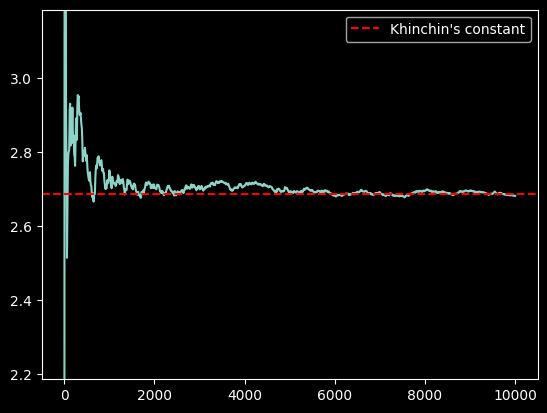

In [14]:
mean_num = np.mean(nums)
print('Mean of random nums:',float(mean_num))
mean_line = compute_CF_GMs(num, num_coeffs)
plt.plot(line_x_points, np.interp(line_x_points, np.arange(1, num_coeffs+1), mean_line))
plt.ylim(float(K)-0.5, float(K)+0.5)
plt.axhline(K, color='r', linestyle='--', label="Khinchin's constant")
plt.legend()
plt.show()

In [15]:
print('Error of the last point of the average line:', float(abs(K - avg_of_mean_lines[-1]))) # Error of last point
print('Average error of the mean line:', float((abs(K - avg_of_mean_lines)).mean())) # Error of last point

Error of the last point of the average line: 0.0005611431086844774
Average error of the mean line: 0.007699367025750862


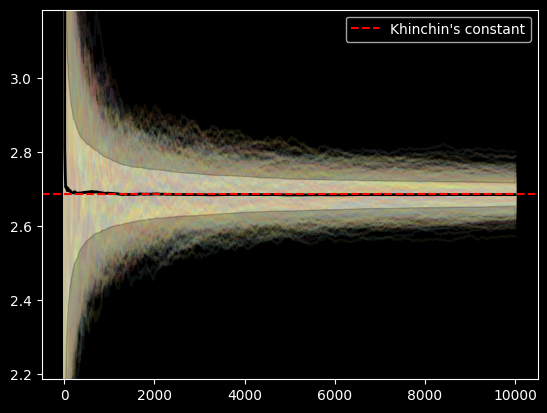

In [16]:
# fig, ax = plt.subplots(figsize=(24,12))
for mean_line in mean_lines:
  plt.plot(line_x_points, mean_line, alpha=0.1)
plt.plot(line_x_points, avg_of_mean_lines, c='k', linewidth=2)
plt.axhline(K, color='r', linestyle='--', label="Khinchin's constant")

# Highlight the region within standard deviation by dimming the region outside of it.
plt.gca().fill_between(line_x_points,
                       avg_of_mean_lines - std_of_mean_lines,
                       float(K)-0.5,
                       color='k', alpha=0.2, zorder=2)
plt.gca().fill_between(line_x_points,
                       avg_of_mean_lines + std_of_mean_lines,
                       float(K)+0.5,
                       color='k', alpha=0.2, zorder=2)

plt.ylim(float(K)-0.5, float(K)+0.5)
plt.legend()
plt.show()

In [18]:
from modules.visualize import animate_all_lines, animate_average_line, animate_line_by_line, save_anim

### Animate all lines

In [ ]:
anim = animate_all_lines(line_x_points, mean_lines, vibrant=True)
save_anim(anim, '../animations/light_wine_active.mp4')
plt.close()

  0%|          | 1/1000 [00:00<?, ?it/s]

### Animate just the average line

In [ ]:
anim = animate_average_line(line_x_points, mean_lines)
save_anim(anim, '../animations/light_wine_mean.mp4')
plt.close()

  0%|          | 1/1000 [00:00<?, ?it/s]

### Animate lines one by one

In [21]:
anim = animate_line_by_line(nums, line_x_points, mean_lines)
save_anim(anim, '../animations/current.mp4', fps=15)
plt.close()

  0%|          | 1/1178 [00:00<?, ?it/s]